In [ ]:
"""
This implementation is based on https://pytorch.org/tutorials/beginner/basics/intro.html
"""

# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\| **Tensors** \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Tensors
=======

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model's parameters.

Tensors are similar to [NumPy's](https://numpy.org/) ndarrays, except
that tensors can run on GPUs or other hardware accelerators. In fact,
tensors and NumPy arrays can often share the same underlying memory,
eliminating the need to copy data (see
`bridge-to-np-label`{.interpreted-text role="ref"}). Tensors are also
optimized for automatic differentiation (we\'ll see more about that
later in the [Autograd](autogradqs_tutorial.html) section). If you're
familiar with ndarrays, you'll be right at home with the Tensor API. If
not, follow along!


In [ ]:
import torch
import numpy as np

Initializing a Tensor
=====================

Tensors can be initialized in various ways. Take a look at the following
examples:

**Directly from data**

Tensors can be created directly from data. The data type is
automatically inferred.


In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see
`bridge-to-np-label`{.interpreted-text role="ref"}).


In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument
tensor, unless explicitly overridden.


In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5367, 0.0070],
        [0.0965, 0.7916]]) 



**With random or constant values:**

`shape` is a tuple of tensor dimensions. In the functions below, it
determines the dimensionality of the output tensor.


In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9822, 0.4503, 0.8996],
        [0.0953, 0.1695, 0.6335]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


------------------------------------------------------------------------


Attributes of a Tensor
======================

Tensor attributes describe their shape, datatype, and the device on
which they are stored.


In [ ]:
tensor = torch.rand(3,4,)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
print(f"Tensor: \n {tensor}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Tensor: 
 tensor([[0.2762, 0.8433, 0.7695, 0.3740],
        [0.8750, 0.0796, 0.1614, 0.1316],
        [0.6451, 0.2825, 0.2745, 0.5542]])


------------------------------------------------------------------------


Operations on Tensors
=====================

Over 100 tensor operations, including arithmetic, linear algebra, matrix
manipulation (transposing, indexing, slicing), sampling and more are
comprehensively described
[here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the GPU (at typically higher
speeds than on a CPU). If you're using Colab, allocate a GPU by going to
Runtime \> Change runtime type \> GPU.

By default, tensors are created on the CPU. We need to explicitly move
tensors to the GPU using `.to` method (after checking for GPU
availability). Keep in mind that copying large tensors across devices
can be expensive in terms of time and memory!


In [ ]:
print(f"Device tensor : {tensor.device}")

# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

print(f"Device tensor : {tensor.device}")

Device tensor : cpu
Device tensor : cuda:0


Try out some of the operations from the list. If you\'re familiar with
the NumPy API, you\'ll find the Tensor API a breeze to use.


**Standard numpy-like indexing and slicing:**


In [ ]:
tensor = torch.rand(3, 4)
print(f"Tensor: \n {tensor} \n")
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

Tensor: 
 tensor([[0.6329, 0.3635, 0.6686, 0.2489],
        [0.0300, 0.1097, 0.3749, 0.8706],
        [0.5882, 0.4900, 0.6469, 0.1036]]) 

First row: tensor([0.6329, 0.3635, 0.6686, 0.2489])
First column: tensor([0.6329, 0.0300, 0.5882])
Last column: tensor([0.2489, 0.8706, 0.1036])
tensor([[0.6329, 0.0000, 0.6686, 0.2489],
        [0.0300, 0.0000, 0.3749, 0.8706],
        [0.5882, 0.0000, 0.6469, 0.1036]])


In [ ]:
tensor = torch.ones(4, 4)
tensor[0, 0] = 100
print(tensor)

tensor([[100.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]])


In [ ]:
tensor = torch.ones(4, 4)
tensor[1:3, 0] = 100
print(tensor)

tensor([[  1.,   1.,   1.,   1.],
        [100.,   1.,   1.,   1.],
        [100.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]])


In [ ]:
tensor = torch.ones(4, 4)
tensor[1:3, 2:4] = 100
print(tensor)

tensor([[  1.,   1.,   1.,   1.],
        [  1.,   1., 100., 100.],
        [  1.,   1., 100., 100.],
        [  1.,   1.,   1.,   1.]])


In [ ]:
tensor = torch.ones(4, 4)
tensor[1:3, 2:4] *= -1
print(tensor)

tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  1., -1., -1.],
        [ 1.,  1., -1., -1.],
        [ 1.,  1.,  1.,  1.]])


In [ ]:
# importance of indexing and slicing
import time

height, width = 100, 100
tensor = torch.ones(height, width)

avg_time = []
for _ in range(100):
    start_time = time.time()

    for i in range(width):
      for j in range(height):
        tensor[j, i] = 7

    end_time = time.time()
    avg_time.append(end_time - start_time)

print("Average time for for-loop: %.6f ms" % (sum(avg_time) / len(avg_time)*1000.))

Average time for for-loop: 64.386690 ms


In [ ]:
height, width = 100, 100
tensor = torch.ones(height, width)

avg_time = []
for _ in range(100):
    start_time = time.time()
    tensor[:, :] = 7 # tensor[0:height, 0:width] = 7
    end_time = time.time()
    avg_time.append(end_time - start_time)

print("Average time for slicing: %.6f ms" % (sum(avg_time) / len(avg_time)*1000.))

Average time for slicing: 0.018573 ms


**Joining tensors** You can use `torch.cat` to concatenate a sequence of
tensors along a given dimension. See also
[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining operator that is subtly different from
`torch.cat`.


In [ ]:
tensor = torch.ones(2, 4)

t0 = torch.cat([tensor, tensor, tensor], dim=0)
print(t0)
print(tensor.shape, " -> ", t0.shape)

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
print(tensor.shape, " -> ", t1.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([2, 4])  ->  torch.Size([6, 4])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
torch.Size([2, 4])  ->  torch.Size([2, 12])


**Arithmetic operations**


In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2 will have the same value
# ``tensor.T`` returns the transpose of a tensor

tensor_1 = torch.ones(2, 4) + 1
tensor_2 = torch.ones(2, 4) + 2

print(f"tensor_1 : \n {tensor_1} \n", tensor_1.shape)
print(f"tensor_2 : \n {tensor_2} \n",tensor_2.shape)

y1 = tensor_1 @ tensor_2.T
y2 = tensor_1.matmul(tensor_2.T)
print("dot product : ", y1.shape, y2.shape)
print(y1)
print(y2)
print()


# This computes the element-wise product. z1, z2 will have the same value
z1 = tensor_1 * tensor_2
z2 = tensor_1.mul(tensor_2)
print("element-wise product : ", z1.shape, z2.shape)
print(z1)
print(z2)

tensor_1 : 
 tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.]]) 
 torch.Size([2, 4])
tensor_2 : 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 
 torch.Size([2, 4])
dot product :  torch.Size([2, 2]) torch.Size([2, 2])
tensor([[24., 24.],
        [24., 24.]])
tensor([[24., 24.],
        [24., 24.]])

element-wise product :  torch.Size([2, 4]) torch.Size([2, 4])
tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.]])
tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.]])


**Single-element tensors** If you have a one-element tensor, for example
by aggregating all values of a tensor into one value, you can convert it
to a Python numerical value using `item()`:


In [ ]:
tensor = torch.rand(3,4)
print(tensor)

agg = tensor.sum()
agg_item = agg.item()
print("tensor scalar : ", agg, type(agg))
print("scalar : ", agg_item, type(agg_item))

tensor([[0.2941, 0.3162, 0.1665, 0.8535],
        [0.6760, 0.6318, 0.3548, 0.7384],
        [0.7615, 0.2721, 0.4655, 0.8544]])
tensor scalar :  tensor(6.3848) <class 'torch.Tensor'>
scalar :  6.384835243225098 <class 'float'>


**In-place operations** Operations that store the result into the
operand are called in-place. They are denoted by a `_` suffix. For
example: `x.copy_(y)`, `x.t_()`, will change `x`.


In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[0.2941, 0.3162, 0.1665, 0.8535],
        [0.6760, 0.6318, 0.3548, 0.7384],
        [0.7615, 0.2721, 0.4655, 0.8544]]) 

tensor([[5.2941, 5.3162, 5.1665, 5.8535],
        [5.6760, 5.6318, 5.3548, 5.7384],
        [5.7615, 5.2721, 5.4655, 5.8544]])


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate lossof history. Hence, their use is discouraged.</p>
</div>


------------------------------------------------------------------------


Bridge with NumPy {#bridge-to-np-label}
=================

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change the other.


Tensor to NumPy array
=====================


In [ ]:
t = torch.ones(5,)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor
=====================


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)
print("np : ", n.shape, type(n))
print("torch : ", t.shape, type(t))

np :  (5,) <class 'numpy.ndarray'>
torch :  torch.Size([5]) <class 'torch.Tensor'>


Changes in the NumPy array reflects in the tensor.


In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| **Datasets & DataLoaders** \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Datasets & DataLoaders
======================


Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)


Loading a Dataset
=================

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

:   -   `root` is the path where the train/test data is stored,
    -   `train` specifies training or test dataset,
    -   `download=True` downloads the data from the internet if it\'s
        not available at `root`.
    -   `transform` and `target_transform` specify the feature and label
        transformations


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.18MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.59MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 21.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and Visualizing the Dataset
=====================================

We can index `Datasets` manually like a list: `training_data[index]`. We
use `matplotlib` to visualize some samples in our training data.


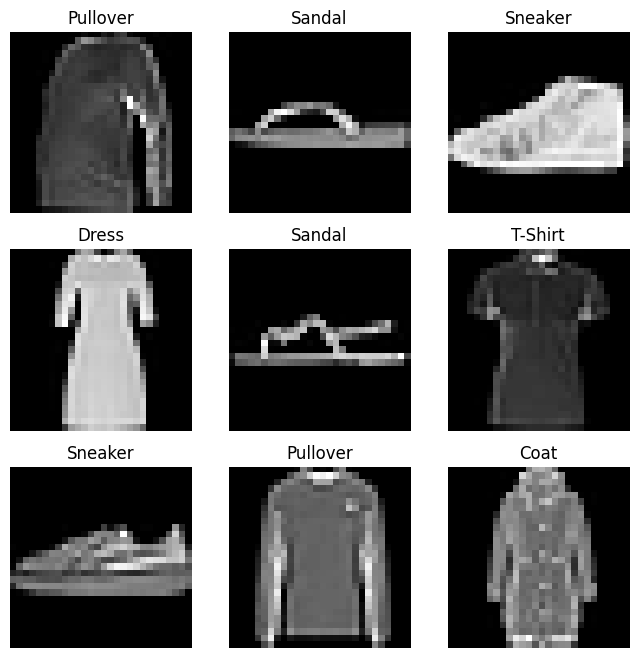

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

------------------------------------------------------------------------


Preparing your data for training with DataLoaders
=================================================

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader
==============================

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


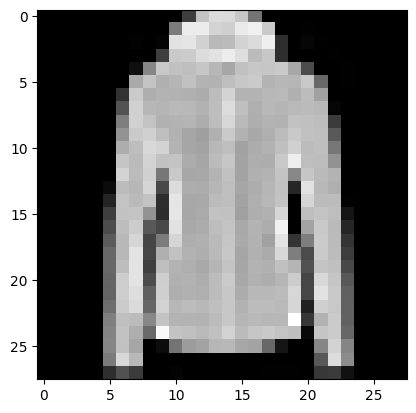

Label: 4


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------


Further Reading
===============

-   [torch.utils.data API](https://pytorch.org/docs/stable/data.html)


[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| **Build Model** \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Build the Neural Network
========================

Neural networks comprise of layers/modules that perform operations on
data. The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace
provides all the building blocks you need to build your own neural
network. Every module in PyTorch subclasses the
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
A neural network is a module itself that consists of other modules
(layers). This nested structure allows for building and managing complex
architectures easily.

In the following sections, we\'ll build a neural network to classify
images in the FashionMNIST dataset.


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Get Device for Training
=======================

We want to be able to train our model on a hardware accelerator like the
GPU or MPS, if available. Let\'s check to see if
[torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html) or
[torch.backends.mps](https://pytorch.org/docs/stable/notes/mps.html) are
available, otherwise we use the CPU.


In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


Define the Class
================

We define our neural network by subclassing `nn.Module`, and initialize
the neural network layers in `__init__`. Every `nn.Module` subclass
implements the operations on input data in the `forward` method.


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`,
and print its structure.


In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model\'s
`forward`, along with some [background
operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0
corresponding to each output of 10 raw predicted values for each class,
and dim=1 corresponding to the individual values of each output. We get
the prediction probabilities by passing it through an instance of the
`nn.Softmax` module.


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print("logits : ", logits.shape)
pred_probab = nn.Softmax(dim=1)(logits)
print("pred_probab : ", pred_probab.shape)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

logits :  torch.Size([1, 10])
pred_probab :  torch.Size([1, 10])
Predicted class: tensor([2], device='cuda:0')


In [ ]:
# CPU vs GPU

device = "cpu"
model = NeuralNetwork().to(device)
X = torch.rand(1, 28, 28, device=device)

avg_time = []
for _ in range(1000):
  start_time = time.time()
  y = model(X)
  end_time = time.time()
  avg_time.append(end_time-start_time)

print(f"average CPU time : {1000*np.mean(avg_time[100:]):>4f} ms")

device = "cuda"
model = NeuralNetwork().to(device)
X = torch.rand(1, 28, 28, device=device)

avg_time = []
for _ in range(1000):
  start_time = time.time()
  y = model(X)
  end_time = time.time()
  avg_time.append(end_time-start_time)

print(f"average GPU time : {1000*np.mean(avg_time[100:]):>4f} ms")

average CPU time : 0.235519 ms
average GPU time : 0.135581 ms


------------------------------------------------------------------------


Model Layers
============

Let\'s break down the layers in the FashionMNIST model. To illustrate
it, we will take a sample minibatch of 3 images of size 28x28 and see
what happens to it as we pass it through the network.


In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


nn.Flatten
==========

We initialize the
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
layer to convert each 2D 28x28 image into a contiguous array of 784
pixel values ( the minibatch dimension (at dim=0) is maintained).


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


nn.Linear
=========

The [linear
layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
is a module that applies a linear transformation on the input using its
stored weights and biases.


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU
=======

Non-linear activations are what create the complex mappings between the
model\'s inputs and outputs. They are applied after linear
transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena.

In this model, we use
[nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
between our linear layers, but there\'s other activations to introduce
non-linearity in your model.


In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1_relu = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1_relu}")

Before ReLU: tensor([[-0.3106,  0.3433,  0.0115, -0.6163, -0.4768,  0.9252, -0.5039, -0.6148,
          0.3604,  0.6103, -0.4050, -0.2755,  0.3411, -0.1223,  0.0452,  0.1693,
          0.2726, -0.5573, -0.1272, -0.2253],
        [-0.0699,  0.1062,  0.1544, -0.4801, -0.6602,  0.8122, -0.3893, -0.8192,
          0.1182,  0.4691, -0.1791,  0.0571, -0.1136,  0.0417,  0.0914,  0.2328,
          0.3998, -0.4040, -0.0248, -0.0452],
        [-0.2797, -0.2428,  0.1540, -0.3527, -0.8981,  0.9185, -0.6533, -1.0670,
          0.1865,  0.3784, -0.3449, -0.2111, -0.0435,  0.2463, -0.0528,  0.1169,
          0.0661, -0.6229,  0.1853, -0.3136]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.3433, 0.0115, 0.0000, 0.0000, 0.9252, 0.0000, 0.0000, 0.3604,
         0.6103, 0.0000, 0.0000, 0.3411, 0.0000, 0.0452, 0.1693, 0.2726, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.1062, 0.1544, 0.0000, 0.0000, 0.8122, 0.0000, 0.0000, 0.1182,
         0.4691, 0.0000, 0.0571, 0.0000, 0.0417, 0.09

In [ ]:
print(f"Before Sigmoid: {hidden1}\n\n")
hidden1_sigmoid = nn.Sigmoid()(hidden1)
print(f"After Sigmoid: {hidden1_sigmoid}")

Before Sigmoid: tensor([[-0.3106,  0.3433,  0.0115, -0.6163, -0.4768,  0.9252, -0.5039, -0.6148,
          0.3604,  0.6103, -0.4050, -0.2755,  0.3411, -0.1223,  0.0452,  0.1693,
          0.2726, -0.5573, -0.1272, -0.2253],
        [-0.0699,  0.1062,  0.1544, -0.4801, -0.6602,  0.8122, -0.3893, -0.8192,
          0.1182,  0.4691, -0.1791,  0.0571, -0.1136,  0.0417,  0.0914,  0.2328,
          0.3998, -0.4040, -0.0248, -0.0452],
        [-0.2797, -0.2428,  0.1540, -0.3527, -0.8981,  0.9185, -0.6533, -1.0670,
          0.1865,  0.3784, -0.3449, -0.2111, -0.0435,  0.2463, -0.0528,  0.1169,
          0.0661, -0.6229,  0.1853, -0.3136]], grad_fn=<AddmmBackward0>)


After Sigmoid: tensor([[0.4230, 0.5850, 0.5029, 0.3506, 0.3830, 0.7161, 0.3766, 0.3510, 0.5891,
         0.6480, 0.4001, 0.4316, 0.5844, 0.4695, 0.5113, 0.5422, 0.5677, 0.3642,
         0.4683, 0.4439],
        [0.4825, 0.5265, 0.5385, 0.3822, 0.3407, 0.6926, 0.4039, 0.3059, 0.5295,
         0.6152, 0.4553, 0.5143, 0.4716, 0.5104

nn.Sequential
=============

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)
is an ordered container of modules. The data is passed through all the
modules in the same order as defined. You can use sequential containers
to put together a quick network like `seq_modules`.


In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

nn.Softmax
==========

The last linear layer of the neural network returns [logits]{.title-ref}
- raw values in \[-infty, infty\] - which are passed to the
[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
module. The logits are scaled to values \[0, 1\] representing the
model\'s predicted probabilities for each class. `dim` parameter
indicates the dimension along which the values must sum to 1.


In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

Model Parameters
================

Many layers inside a neural network are *parameterized*, i.e. have
associated weights and biases that are optimized during training.
Subclassing `nn.Module` automatically tracks all fields defined inside
your model object, and makes all parameters accessible using your
model\'s `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and
a preview of its values.


In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0312, -0.0150,  0.0022,  ..., -0.0301,  0.0246, -0.0248],
        [-0.0038, -0.0288, -0.0158,  ..., -0.0307, -0.0347, -0.0060]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0135, -0.0231], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0160, -0.0154, -0.0070,  ...,  0.0289,  0.0038,  0.0315],
        [-0.0392, -0.0014, -0.0103,  ..., -0.0384,  0.0349,  0.0327]],
       device='cuda:0', grad_fn=<Sl

------------------------------------------------------------------------


Further Reading
===============

-   [torch.nn API](https://pytorch.org/docs/stable/nn.html)


[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\| **Autograd** \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Automatic Differentiation with `torch.autograd`
===============================================

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation
engine called `torch.autograd`. It supports automatic computation of
gradient for any computational graph.

Consider the simplest one-layer neural network, with input `x`,
parameters `w` and `b`, and some loss function. It can be defined in
PyTorch in the following manner:


In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print("x : ", x)
print("w : ", w)
print("z : ", z)
print("loss : ", loss)

x :  tensor([1., 1., 1., 1., 1.])
w :  tensor([[ 1.0884,  0.2105,  1.4446],
        [-1.3059, -1.5153,  1.1188],
        [-0.7989,  0.7009,  0.3895],
        [-0.5417,  0.3661, -0.5897],
        [ 1.5013,  0.1068,  0.4185]], requires_grad=True)
z :  tensor([ 1.3158, -1.1663,  0.3643], grad_fn=<AddBackward0>)
loss :  tensor(0.9055, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


Tensors, Functions and Computational graph
==========================================

This code defines the following **computational graph**:

![](https://pytorch.org/tutorials/_static/img/basics/comp-graph.png)

In this network, `w` and `b` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the `requires_grad` property of those tensors.


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>You can set the value of <code>requires_grad</code> when creating atensor, or later by using <code>x.requires_grad_(True)</code> method.</p>
</div>


A function that we apply to tensors to construct computational graph is
in fact an object of class `Function`. This object knows how to compute
the function in the *forward* direction, and also how to compute its
derivative during the *backward propagation* step. A reference to the
backward propagation function is stored in `grad_fn` property of a
tensor. You can find more information of `Function` [in the
documentation](https://pytorch.org/docs/stable/autograd.html#function).


In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f343013cb50>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f343013d600>


Computing Gradients
===================

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of `x` and
`y`. To compute those derivatives, we call `loss.backward()`, and then
retrieve the values from `w.grad` and `b.grad`:


In [ ]:
print(w.grad)
print(b.grad)

loss.backward()
print(w.grad)
print(b.grad)

None
None
tensor([[0.2628, 0.0792, 0.1967],
        [0.2628, 0.0792, 0.1967],
        [0.2628, 0.0792, 0.1967],
        [0.2628, 0.0792, 0.1967],
        [0.2628, 0.0792, 0.1967]])
tensor([0.2628, 0.0792, 0.1967])


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<ul>
<li>We can only obtain the <code>grad</code> properties for the leafnodes of the computational graph, which have <code>requires_grad</code> propertyset to <code>True</code>. For all other nodes in our graph, gradients will not beavailable.- We can only perform gradient calculations using<code>backward</code> once on a given graph, for performance reasons. If we needto do several <code>backward</code> calls on the same graph, we need to pass<code>retain_graph=True</code> to the <code>backward</code> call.</li>
</ul>
</div>


Disabling Gradient Tracking
===========================

By default, all tensors with `requires_grad=True` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
`torch.no_grad()` block:


In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the `detach()` method
on the tensor:


In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:

:   -   To mark some parameters in your neural network as **frozen
        parameters**.
    -   To **speed up computations** when you are only doing forward
        pass, because computations on tensors that do not track
        gradients would be more efficient.


Notice that when we call `backward` for the second time with the same
argument, the value of the gradient is different. This happens because
when doing `backward` propagation, PyTorch **accumulates the
gradients**, i.e. the value of computed gradients is added to the `grad`
property of all leaf nodes of computational graph. If you want to
compute the proper gradients, you need to zero out the `grad` property
before. In real-life training an *optimizer* helps us to do this.


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>Previously we were calling <code>backward()</code> function withoutparameters. This is essentially equivalent to calling<code>backward(torch.tensor(1.0))</code>, which is a useful way to compute thegradients in case of a scalar-valued function, such as loss duringneural network training.</p>
</div>


------------------------------------------------------------------------


[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\| **Optimization** \|\| [Save &
Load Model](saveloadrun_tutorial.html)

Optimizing Model Parameters
===========================

Now that we have a model and data it\'s time to train, validate and test
our model by optimizing its parameters on our data. Training a model is
an iterative process; in each iteration the model makes a guess about
the output, calculates the error in its guess (*loss*), collects the
derivatives of the error with respect to its parameters (as we saw in
the [previous section](autograd_tutorial.html)), and **optimizes** these
parameters using gradient descent. For a more detailed walkthrough of
this process, check out this video on [backpropagation from
3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

Prerequisite Code
-----------------

We load the code from the previous sections on [Datasets &
DataLoaders](data_tutorial.html) and [Build
Model](buildmodel_tutorial.html).


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

Hyperparameters
===============

Hyperparameters are adjustable parameters that let you control the model
optimization process. Different hyperparameter values can impact model
training and convergence rates ([read
more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)
about hyperparameter tuning)

We define the following hyperparameters for training:

:   -   **Number of Epochs** - the number times to iterate over the
        dataset
    -   **Batch Size** - the number of data samples propagated through
        the network before the parameters are updated
    -   **Learning Rate** - how much to update models parameters at each
        batch/epoch. Smaller values yield slow learning speed, while
        large values may result in unpredictable behavior during
        training.


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

Optimization Loop
=================

Once we set our hyperparameters, we can then train and optimize our
model with an optimization loop. Each iteration of the optimization loop
is called an **epoch**.

Each epoch consists of two main parts:

:   -   **The Train Loop** - iterate over the training dataset and try
        to converge to optimal parameters.
    -   **The Validation/Test Loop** - iterate over the test dataset to
        check if model performance is improving.

Let\'s briefly familiarize ourselves with some of the concepts used in
the training loop. Jump ahead to see the
`full-impl-label`{.interpreted-text role="ref"} of the optimization
loop.

Loss Function
-------------

When presented with some training data, our untrained network is likely
not to give the correct answer. **Loss function** measures the degree of
dissimilarity of obtained result to the target value, and it is the loss
function that we want to minimize during training. To calculate the loss
we make a prediction using the inputs of our given data sample and
compare it against the true data label value.

Common loss functions include
[nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
(Mean Square Error) for regression tasks, and
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss)
(Negative Log Likelihood) for classification.
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model\'s output logits to `nn.CrossEntropyLoss`, which will
normalize the logits and compute the prediction error.


In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

Optimizer
=========

Optimization is the process of adjusting model parameters to reduce
model error in each training step. **Optimization algorithms** define
how this process is performed (in this example we use Stochastic
Gradient Descent). All optimization logic is encapsulated in the
`optimizer` object. Here, we use the SGD optimizer; additionally, there
are many [different
optimizers](https://pytorch.org/docs/stable/optim.html) available in
PyTorch such as ADAM and RMSProp, that work better for different kinds
of models and data.

We initialize the optimizer by registering the model\'s parameters that
need to be trained, and passing in the learning rate hyperparameter.


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

:   -   Call `optimizer.zero_grad()` to reset the gradients of model
        parameters. Gradients by default add up; to prevent
        double-counting, we explicitly zero them at each iteration.
    -   Backpropagate the prediction loss with a call to
        `loss.backward()`. PyTorch deposits the gradients of the loss
        w.r.t. each parameter.
    -   Once we have our gradients, we call `optimizer.step()` to adjust
        the parameters by the gradients collected in the backward pass.


Full Implementation {#full-impl-label}
===================

We define `train_loop` that loops over our optimization code, and
`test_loop` that evaluates the model\'s performance against our test
data.


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    avg_time = []
    for batch, (X, y) in enumerate(dataloader):
        start_time = time.time()

        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        end_time = time.time()
        avg_time.append(end_time - start_time)

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f} | iter_time: {1000*np.mean(avg_time):>4f}ms [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn, device):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to
`train_loop` and `test_loop`. Feel free to increase the number of epochs
to track the model\'s improving performance.


In [ ]:
# single-layer perception

learning_rate = 1e-4
batch_size = 64
epochs = 5
device = 'cuda'

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
loss: 2.341466 | iter_time: 195.491552ms [   64/60000]
loss: 2.325645 | iter_time: 2.885514ms [ 6464/60000]
loss: 2.278062 | iter_time: 1.950263ms [12864/60000]
loss: 2.264899 | iter_time: 1.633564ms [19264/60000]
loss: 2.246338 | iter_time: 1.476831ms [25664/60000]
loss: 2.215256 | iter_time: 1.354234ms [32064/60000]
loss: 2.185297 | iter_time: 1.269761ms [38464/60000]
loss: 2.189318 | iter_time: 1.210846ms [44864/60000]
loss: 2.194884 | iter_time: 1.166530ms [51264/60000]
loss: 2.161800 | iter_time: 1.131715ms [57664/60000]
Test Error: 
 Accuracy: 30.4%, Avg loss: 2.133397 

Epoch 2
-------------------------------
loss: 2.138939 | iter_time: 1.092911ms [   64/60000]
loss: 2.121130 | iter_time: 0.866784ms [ 6464/60000]
loss: 2.080222 | iter_time: 0.866019ms [12864/60000]
loss: 2.077311 | iter_time: 0.868499ms [19264/60000]
loss: 2.073975 | iter_time: 0.870599ms [25664/60000]
loss: 2.041107 | iter_time: 0.868452ms [32064/60000]
loss: 2.030491 | i

In [ ]:
# multi-layer perception

learning_rate = 1e-4
batch_size = 64
epochs = 5
device = 'cuda'

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Sigmoid(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
loss: 2.327415 | iter_time: 1.869440ms [   64/60000]
loss: 2.309391 | iter_time: 2.869741ms [ 6464/60000]
loss: 2.288484 | iter_time: 1.922784ms [12864/60000]
loss: 2.285607 | iter_time: 1.628064ms [19264/60000]
loss: 2.273322 | iter_time: 1.500718ms [25664/60000]
loss: 2.270453 | iter_time: 1.440137ms [32064/60000]
loss: 2.257423 | iter_time: 1.363431ms [38464/60000]
loss: 2.248806 | iter_time: 1.308271ms [44864/60000]
loss: 2.244616 | iter_time: 1.270891ms [51264/60000]
loss: 2.234949 | iter_time: 1.239963ms [57664/60000]
Test Error: 
 Accuracy: 46.7%, Avg loss: 2.228657 

Epoch 2
-------------------------------
loss: 2.226281 | iter_time: 1.124620ms [   64/60000]
loss: 2.231061 | iter_time: 1.003867ms [ 6464/60000]
loss: 2.204901 | iter_time: 0.997133ms [12864/60000]
loss: 2.217807 | iter_time: 0.989566ms [19264/60000]
loss: 2.186226 | iter_time: 0.987656ms [25664/60000]
loss: 2.192253 | iter_time: 0.992807ms [32064/60000]
loss: 2.177315 | ite

In [ ]:
# vanishing gradient

learning_rate = 1e-4
batch_size = 64
epochs = 5
device = 'cuda'

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
loss: 2.336104 | iter_time: 53.982735ms [   64/60000]
loss: 2.322500 | iter_time: 1.680875ms [ 6464/60000]
loss: 2.307798 | iter_time: 1.418370ms [12864/60000]
loss: 2.300722 | iter_time: 1.329744ms [19264/60000]
loss: 2.300797 | iter_time: 1.291040ms [25664/60000]
loss: 2.298547 | iter_time: 1.270157ms [32064/60000]
loss: 2.305914 | iter_time: 1.251196ms [38464/60000]
loss: 2.299656 | iter_time: 1.237091ms [44864/60000]
loss: 2.308189 | iter_time: 1.231208ms [51264/60000]
loss: 2.300859 | iter_time: 1.228360ms [57664/60000]
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.302974 

Epoch 2
-------------------------------
loss: 2.309865 | iter_time: 1.321554ms [   64/60000]
loss: 2.306832 | iter_time: 1.166825ms [ 6464/60000]
loss: 2.302922 | iter_time: 1.166737ms [12864/60000]
loss: 2.301069 | iter_time: 1.152878ms [19264/60000]
loss: 2.301646 | iter_time: 1.146625ms [25664/60000]
loss: 2.301872 | iter_time: 1.149852ms [32064/60000]
loss: 2.302982 | it

In [ ]:
# vanishing gradient

learning_rate = 1e-4
batch_size = 64
epochs = 5
device = 'cuda'

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
loss: 2.311857 | iter_time: 30.549526ms [   64/60000]
loss: 2.308378 | iter_time: 1.445900ms [ 6464/60000]
loss: 2.309686 | iter_time: 1.297818ms [12864/60000]
loss: 2.299950 | iter_time: 1.248147ms [19264/60000]
loss: 2.304260 | iter_time: 1.223603ms [25664/60000]
loss: 2.304853 | iter_time: 1.216265ms [32064/60000]
loss: 2.298281 | iter_time: 1.203801ms [38464/60000]
loss: 2.302258 | iter_time: 1.198115ms [44864/60000]
loss: 2.295393 | iter_time: 1.194741ms [51264/60000]
loss: 2.284281 | iter_time: 1.190511ms [57664/60000]
Test Error: 
 Accuracy: 15.4%, Avg loss: 2.292973 

Epoch 2
-------------------------------
loss: 2.299083 | iter_time: 1.276493ms [   64/60000]
loss: 2.297080 | iter_time: 1.163702ms [ 6464/60000]
loss: 2.295673 | iter_time: 1.228051ms [12864/60000]
loss: 2.289434 | iter_time: 1.267648ms [19264/60000]
loss: 2.292525 | iter_time: 1.291131ms [25664/60000]
loss: 2.289240 | iter_time: 1.264730ms [32064/60000]
loss: 2.287329 | it

In [ ]:
# Deeper Network

learning_rate = 1e-4
batch_size = 64
epochs = 5
device = 'cuda'

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302986 | iter_time: 2.246380ms [   64/60000]
loss: 2.306952 | iter_time: 1.391555ms [ 6464/60000]
loss: 2.300989 | iter_time: 1.364228ms [12864/60000]
loss: 2.304344 | iter_time: 1.353101ms [19264/60000]
loss: 2.304466 | iter_time: 1.360815ms [25664/60000]
loss: 2.298237 | iter_time: 1.415874ms [32064/60000]
loss: 2.308266 | iter_time: 1.480113ms [38464/60000]
loss: 2.299103 | iter_time: 1.459547ms [44864/60000]
loss: 2.300980 | iter_time: 1.444770ms [51264/60000]
loss: 2.299980 | iter_time: 1.430798ms [57664/60000]
Test Error: 
 Accuracy: 8.6%, Avg loss: 2.302387 

Epoch 2
-------------------------------
loss: 2.300175 | iter_time: 1.465559ms [   64/60000]
loss: 2.304286 | iter_time: 1.387891ms [ 6464/60000]
loss: 2.297948 | iter_time: 1.363483ms [12864/60000]
loss: 2.301809 | iter_time: 1.354509ms [19264/60000]
loss: 2.301550 | iter_time: 1.353198ms [25664/60000]
loss: 2.295017 | iter_time: 1.342747ms [32064/60000]
loss: 2.305640 | iter

In [ ]:
# FIND YOUR HYPERPARAMETERS

learning_rate = 0.001
batch_size = 64
epochs = 10
device = 'cuda'

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)
print("Done!")

SyntaxError: invalid syntax (<ipython-input-57-6dac5f0947c5>, line 3)

Further Reading
===============

-   [Loss
    Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
-   [torch.optim](https://pytorch.org/docs/stable/optim.html)
-   [Warmstart Training a
    Model](https://pytorch.org/tutorials/recipes/recipes/warmstarting_model_using_parameters_from_a_different_model.html)
